# Examine FRIB raw data

## Import

First import things and define global varibles.

In [1]:
import h5py as h5
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

%matplotlib widget

trace_path = Path("/data/rcnp-2025-e565/hdf5/")
print_fig = []

In [8]:
run_number = 1056
trace_file_path = trace_path / f"run_{run_number:04d}.h5"
file = h5.File(trace_file_path, "r")
event_group = file["events"]
min_event = event_group.attrs["min_event"]
max_event = event_group.attrs["max_event"]
event_iterator = iter(range(min_event, max_event+1))
print(f"First event: {min_event}, last event: {max_event}")

First event: 0, last event: 27506


In [23]:
event_number = None
if event_number is None:
	event_number = next(event_iterator)
print(f"Analyzing event: {event_number}")
frib_event = event_group[f"event_{event_number}"]["frib_physics"]
frib_event["1906"].shape

Analyzing event: 11


(16, 257)

## check 1906 SIS3316

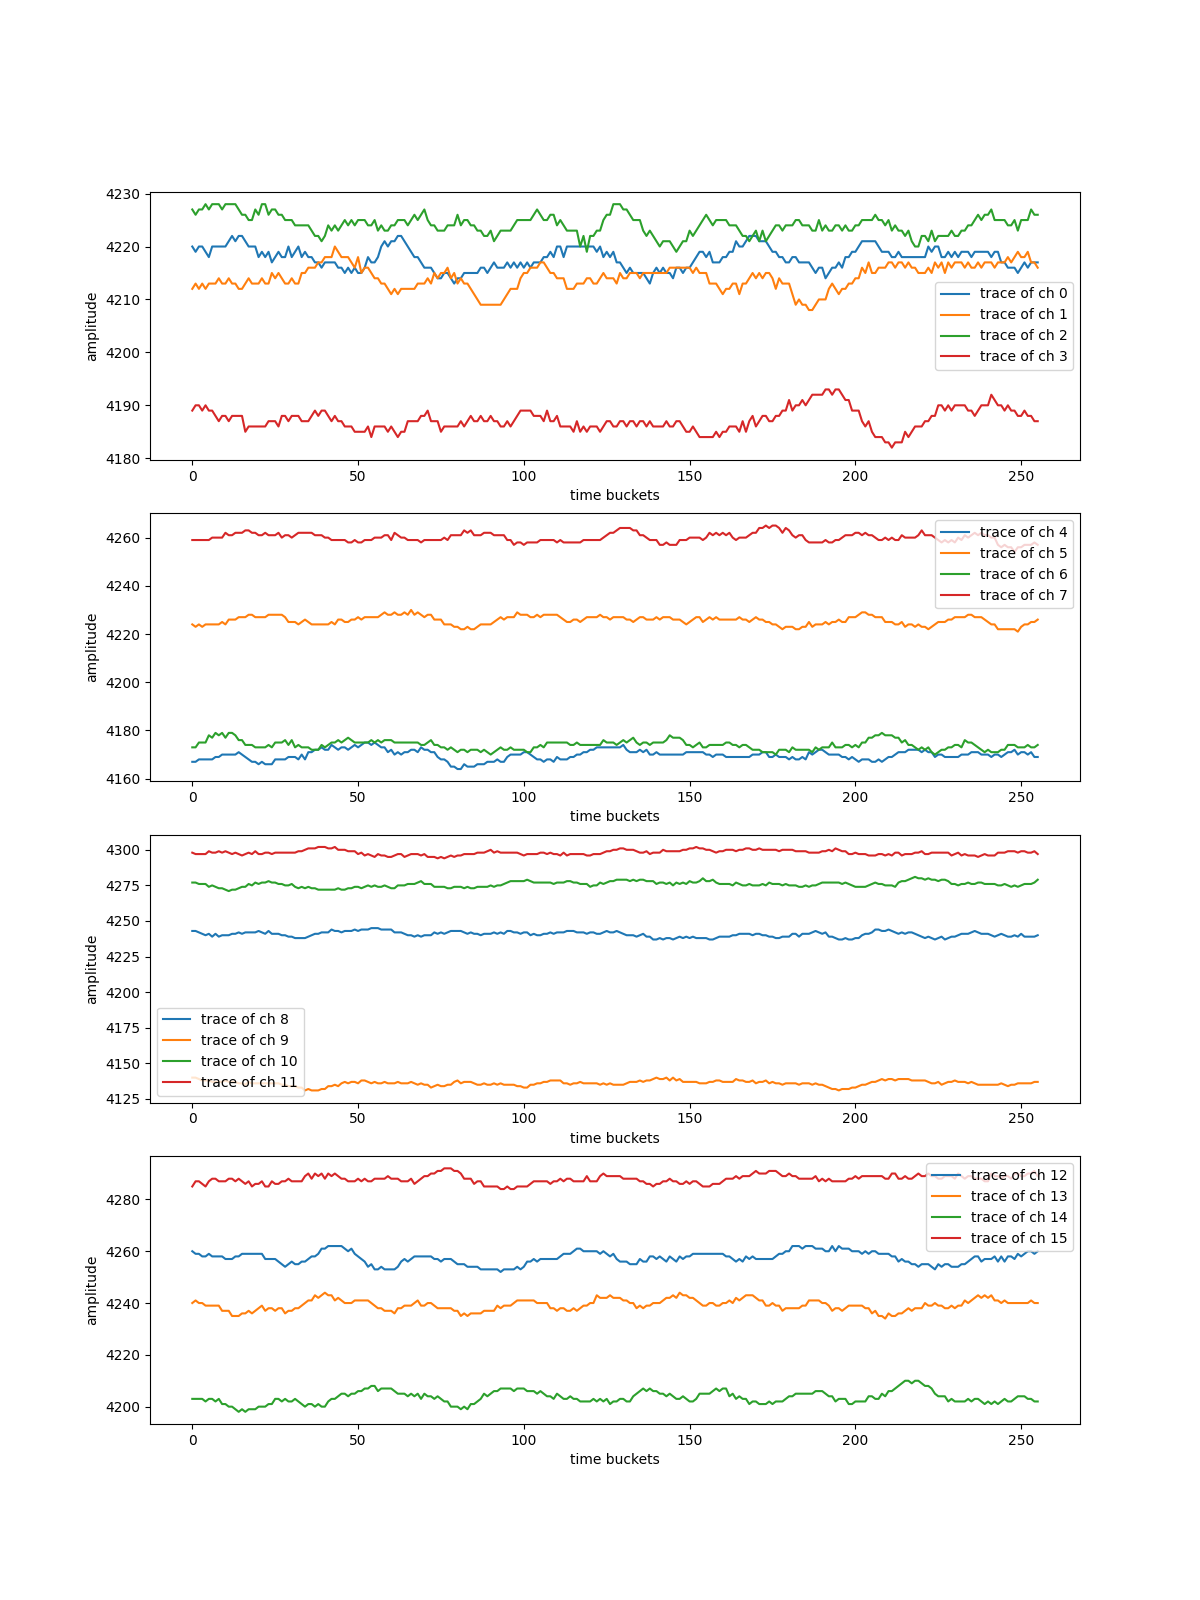

In [4]:
if len(print_fig) == 0:
    print_fig.append(True)
else:
    plt.close(fig0)
time_range_3316 = np.arange(start=0, stop=256)
fig0, axes = plt.subplots(4, 1, figsize=(12.0, 16.0))
for group in range(0, 4):
    for i in range(0, 4):
        axes[group].plot(
            time_range_3316, frib_event["1906"][:][i + group * 4, 1:].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group].set_xlabel("time buckets")
        axes[group].set_ylabel("amplitude")
    axes[group].legend()
plt.show()

## check 1903 SIS3300

0 0 0


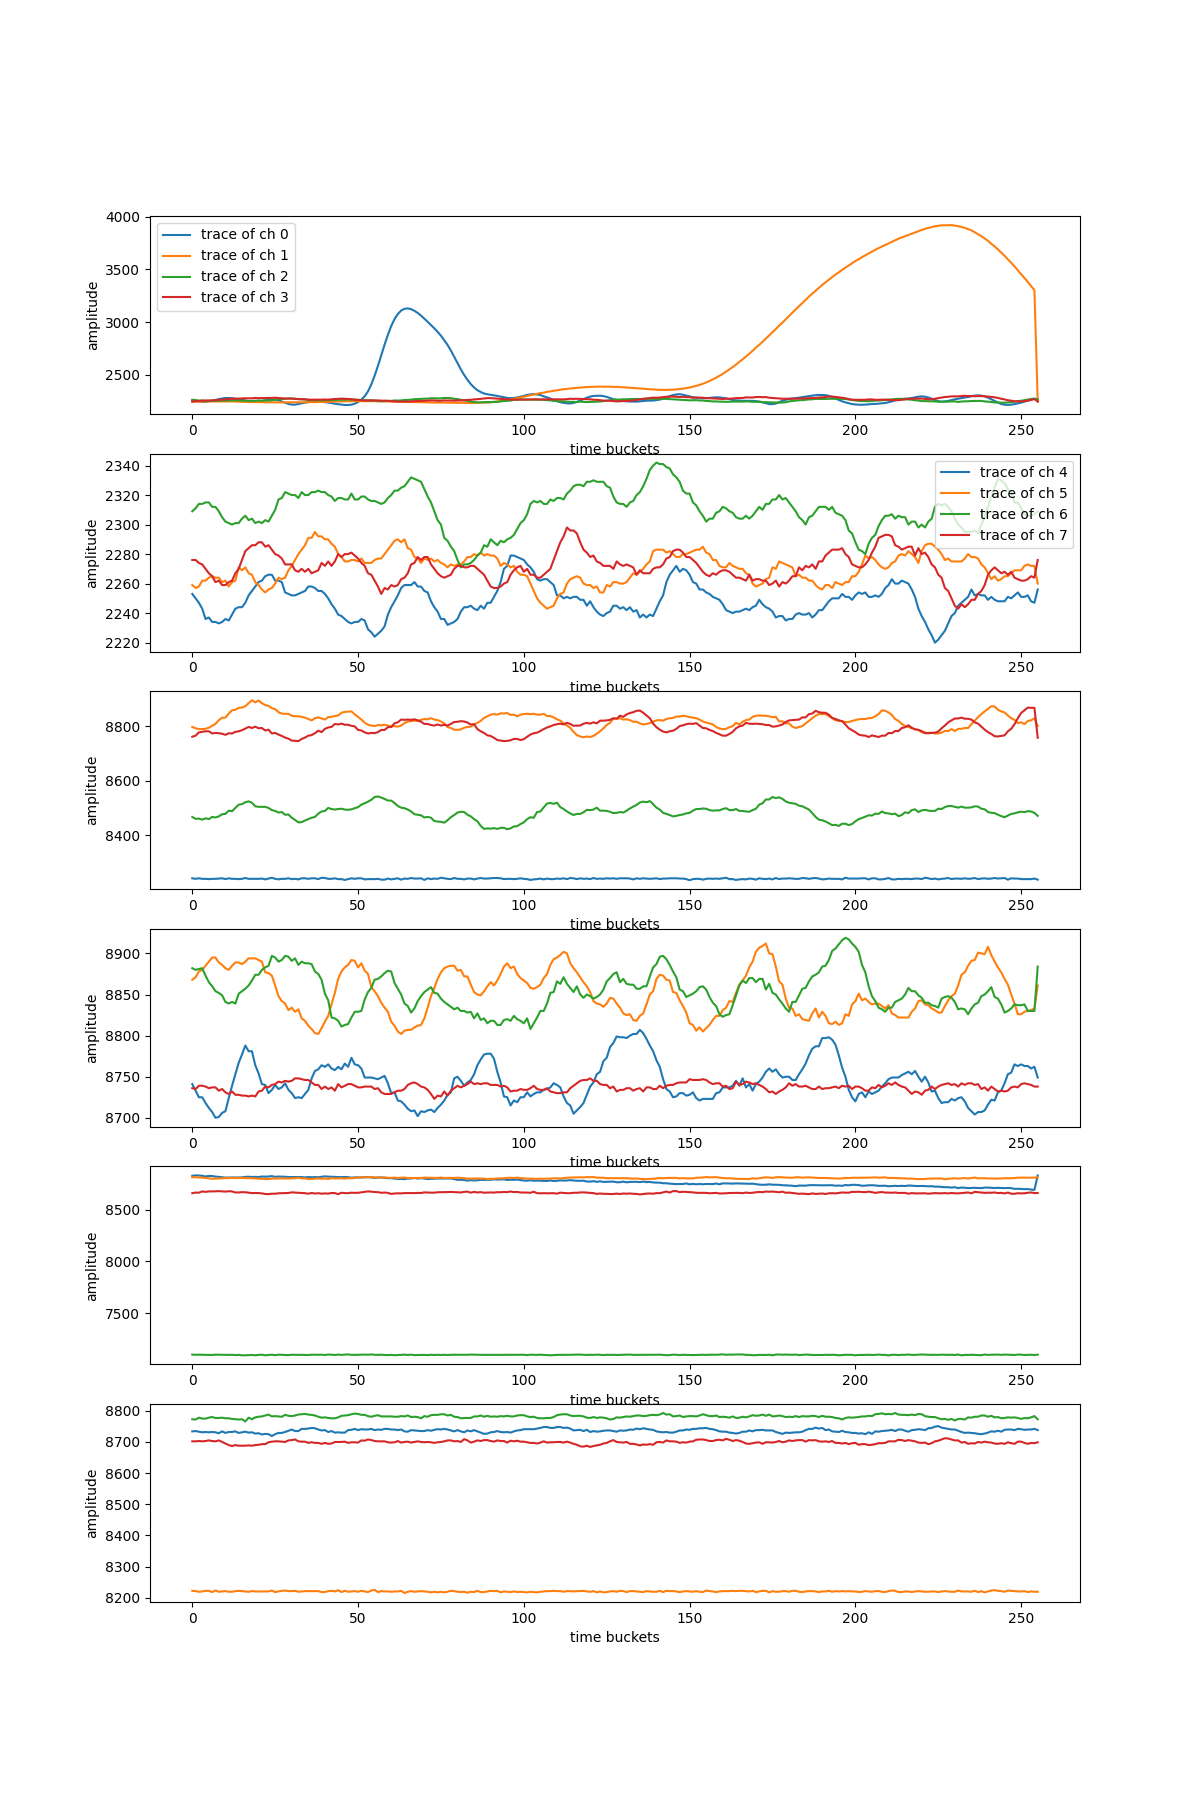

In [25]:
print(frib_event["1903"].attrs["over_range"], frib_event["1904"].attrs["over_range"], frib_event["1905"].attrs["over_range"])
if len(print_fig) == 1:
    print_fig.append(True)
else:
    plt.close(fig1)
time_range_3300 = np.arange(start=0, stop=256)
fig1, axes = plt.subplots(6, 1, figsize=(12.0, 18.0))
for group in range(0, 2):
    for i in range(0, 4):
        axes[group].plot(
            time_range_3300, frib_event["1903"][:][i + group * 4, :].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group].set_xlabel("time buckets")
        axes[group].set_ylabel("amplitude")
    axes[group].legend()
for group in range(0, 2):
    for i in range(0, 4):
        axes[group+2].plot(
            time_range_3300, frib_event["1904"][:][i + group * 4, :].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group+2].set_xlabel("time buckets")
        axes[group+2].set_ylabel("amplitude")
    axes[group].legend()
for group in range(0, 2):
    for i in range(0, 4):
        axes[group+4].plot(
            time_range_3300, frib_event["1905"][:][i + group * 4, :].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group+4].set_xlabel("time buckets")
        axes[group+4].set_ylabel("amplitude")
    axes[group].legend()
plt.show()

## check 1904 SIS3301

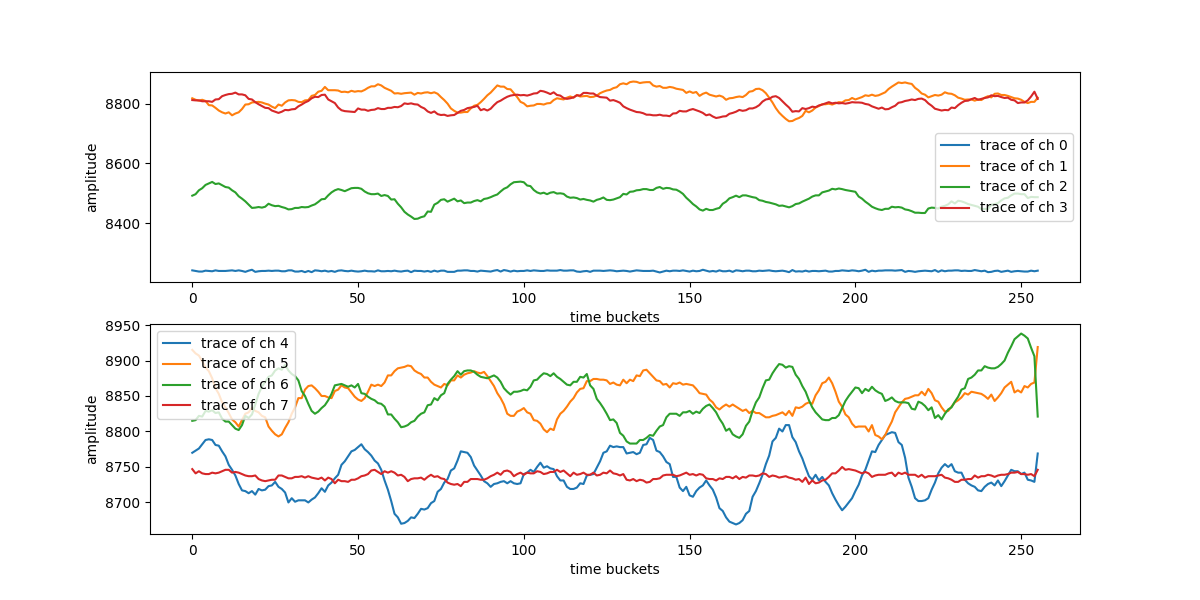

In [6]:
if len(print_fig) == 2:
    print_fig.append(True)
else:
    plt.close(fig2)
fig2, axes = plt.subplots(2, 1, figsize=(12.0, 6.0))
for group in range(0, 2):
    for i in range(0, 4):
        axes[group].plot(
            time_range_3300, frib_event["1904"][:][i + group * 4, :].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group].set_xlabel("time buckets")
        axes[group].set_ylabel("amplitude")
    axes[group].legend()
plt.show()

## check 1905 SIS3301

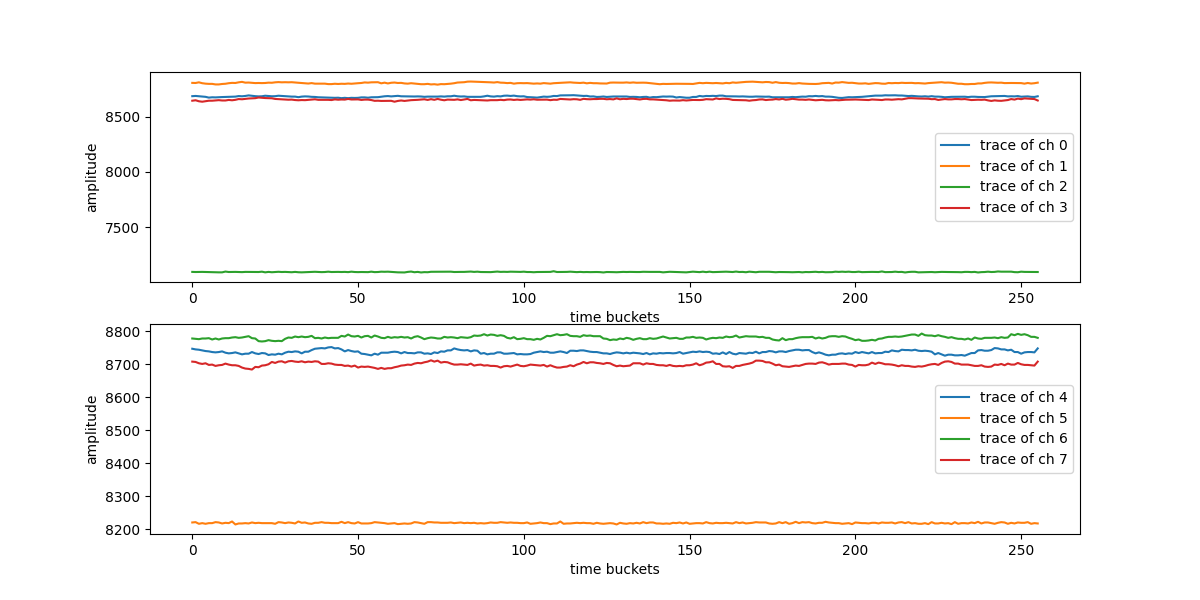

In [7]:
if len(print_fig) == 3:
    print_fig.append(True)
else:
    plt.close(fig3)
fig3, axes = plt.subplots(2, 1, figsize=(12.0, 6.0))
for group in range(0, 2):
    for i in range(0, 4):
        axes[group].plot(
            time_range_3300, frib_event["1905"][:][i + group * 4, :].flatten(),
			label=f"trace of ch {i + group * 4}"
		)
        axes[group].set_xlabel("time buckets")
        axes[group].set_ylabel("amplitude")
    axes[group].legend()
plt.show()